# AJR! at the Disco #
Natalie Gilles - 11/21/2023
***
### Introduction ###
For this project, I decided to report on my two favorite albums of all time; the _Pray for the Wicked_ album from the band "Panic! at the Disco," as well as _Neotheater_ from the band "AJR." These both came out around the same time, one in 2018 (PFTW) and one in 2019 (Neotheater). They were both artists that I were familiar with, but these two albums were just fantastic in my opinion, and I listened to them nonstop for a very long time. With this report, I will be able to compare two audio features to see if there is a reason why I like both these albums, or if there is something similar for the two of them that make me like them. 

#### Album 1 - Pray for the Wicked ####
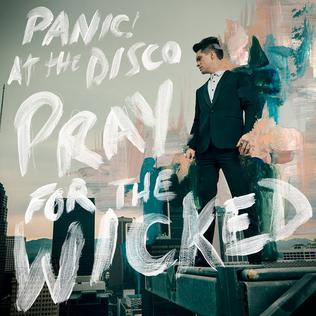

#### Album 2 - Neotheater #####
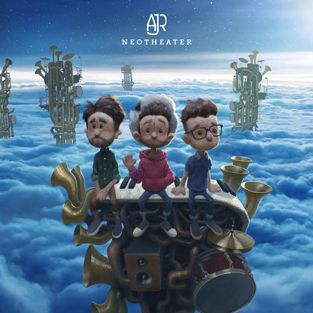

#### Which Audio Features? ####
The two audio features that I chose to fully capture the qualities of the album were the valence and the energy. Energy, according to the Spotify for Developers page, is "a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy." Valence, on the other hand, is "describing the musical positiveness conveyed by a track." I believe that these were the best to look at because they are the general features to really define a song and to fully gain an understanding of the album's overall emotional landscape.

### Grabbing the Proper Data ###
First off, is to call in the proper tools, as well as the created CSV file with the two albums on a data set. I have the process of creating the CSV file on a different notebook, which will be in the same Github location as this notebook.

In [35]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [36]:
af = pd.read_csv('audio_features.csv')

In [37]:
af.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0,0.577,0.939,1,-1.352,0,0.1080,0.0272,0.0,0.240,0.714,105.092,audio_features,3BDxv4ORzOpXAsa4lWVl4i,spotify:track:3BDxv4ORzOpXAsa4lWVl4i,https://api.spotify.com/v1/tracks/3BDxv4ORzOpX...,https://api.spotify.com/v1/audio-analysis/3BDx...,168613,4,PFTW
1,1,0.491,0.867,6,-2.313,0,0.1030,0.1670,0.0,0.458,0.602,167.965,audio_features,76vMKwFtdDDCLcM6zXybjB,spotify:track:76vMKwFtdDDCLcM6zXybjB,https://api.spotify.com/v1/tracks/76vMKwFtdDDC...,https://api.spotify.com/v1/audio-analysis/76vM...,189187,4,PFTW
2,2,0.577,0.833,5,-3.337,1,0.0695,0.0137,0.0,0.121,0.580,107.936,audio_features,22oEJW6r2rMb9z4IntfyEa,spotify:track:22oEJW6r2rMb9z4IntfyEa,https://api.spotify.com/v1/tracks/22oEJW6r2rMb...,https://api.spotify.com/v1/audio-analysis/22oE...,169667,4,PFTW
3,3,0.579,0.904,5,-2.729,1,0.0618,0.1930,0.0,0.064,0.681,82.014,audio_features,1rqqCSm0Qe4I9rUvWncaom,spotify:track:1rqqCSm0Qe4I9rUvWncaom,https://api.spotify.com/v1/tracks/1rqqCSm0Qe4I...,https://api.spotify.com/v1/audio-analysis/1rqq...,190947,4,PFTW
4,4,0.271,0.948,1,-2.207,1,0.2630,0.0467,0.0,0.163,0.515,83.190,audio_features,0wdV94AXGRphrbkDWLNzVC,spotify:track:0wdV94AXGRphrbkDWLNzVC,https://api.spotify.com/v1/tracks/0wdV94AXGRph...,https://api.spotify.com/v1/audio-analysis/0wdV...,186600,4,PFTW


Next is to filter out the correct audio features from the data frame and have them sorted by the specific album for easy grabbing in the future.

In [38]:
PFTW_valence = af[af['album'] == 'PFTW']['valence']
Neo_valence = af[af['album'] == 'Neotheater']['valence']

PFTW_energy = af[af['album'] == 'PFTW']['energy']
Neo_energy = af[af['album'] == 'Neotheater']['energy']

### Comparing and Contrasting ###
Now that all the needed data is organized, we can start displaying it in different plots and charts. To compare the two different audio features by album, I created two histograms for each, and assigned two different colors to represent each album, and they are slightly transparent to see overlapping data. The change in the figure size is to see the data in a more spaced out area that is more appealing to the eyes.

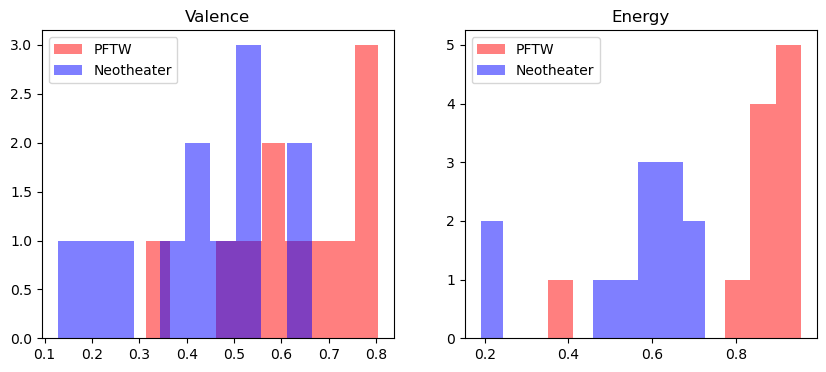

In [39]:
fig1, ax1 = plt.subplots(1, 2, figsize=(10, 4))

ax1[0].hist(PFTW_valence, alpha=0.5, label='PFTW', color = 'red')
ax1[0].hist(Neo_valence, alpha=0.5, label='Neotheater', color = 'blue')
ax1[0].set_title('Valence')
ax1[0].legend()

ax1[1].hist(PFTW_energy, alpha=0.5, label='PFTW', color = 'red')
ax1[1].hist(Neo_energy, alpha=0.5, label='Neotheater', color = 'blue')
ax1[1].set_title('Energy')
ax1[1].legend()

plt.show()

From these two histograms, you can see that the data from both have a mix of high and low valence and energy. Specifically, it looks like the PFTW album has a higher number of songs with more valence and more energy, whereas Neotheater has more songs on the opposite side of the chart. The Neotheater album does not have any songs higher than any on the PFTW album.

### Scatterplots ###
Individually, we are going to look at the correlation between the valence and energy for each album, whilst keep the same color scheme for easier recognition.

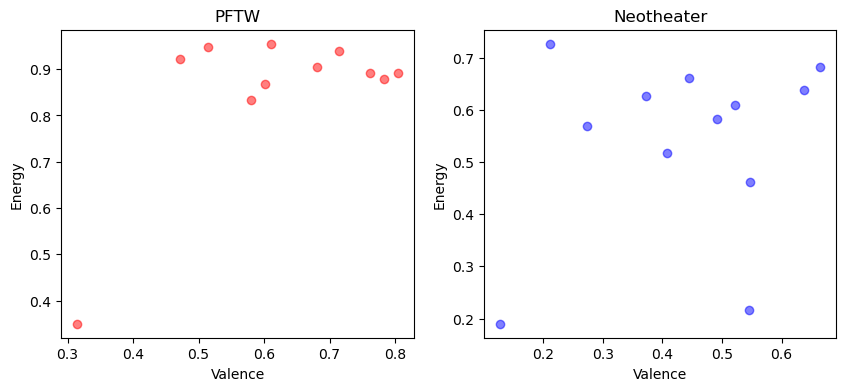

In [40]:
fig2, ax2, = plt.subplots(1, 2, figsize=(10, 4))
ax2[0].scatter(x = PFTW_valence, y = PFTW_energy, c = 'red', alpha = 0.5)
ax2[1].scatter(x = Neo_valence, y = Neo_energy, c = 'blue', alpha = 0.5)

ax2[0].set_xlabel('Valence')
ax2[0].set_ylabel('Energy')
ax2[1].set_xlabel('Valence')
ax2[1].set_ylabel('Energy')

ax2[0].set_title('PFTW')
ax2[1].set_title('Neotheater')

plt.show()

Based on the plotted points, it is clear to see that Neotheater has more songs that vary in energy and valence. For both, it looks as if the songs can have higher energy, but the valence can vary, meaning the song could be upbeat but have a sadder meaning. The PFTW album shows that more prominently than Neotheater does. The one thing that bothers me about these plot comprisons is that they dont have the same x and y scale, so it is hard to fully compare the two. So, lets put them into the same plot (and, add grids for easier navigating).

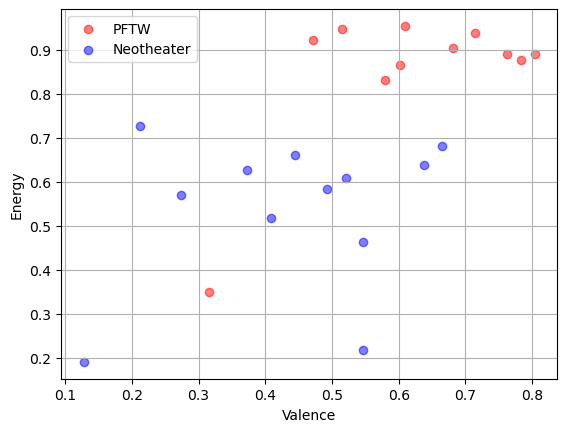

In [41]:
fig3, ax3, = plt.subplots()
ax3.scatter(x = PFTW_valence, y = PFTW_energy, c = 'red', alpha = 0.5, label = 'PFTW')
ax3.scatter(x = Neo_valence, y = Neo_energy, c = 'blue', alpha = 0.5, label = 'Neotheater')
ax3.set_xlabel('Valence')
ax3.set_ylabel('Energy')
ax3.legend()
plt.grid()

plt.show()

Now, we can see that all of the PFTW songs have a higher valence-to-energy correlation, except for 1. Neotheater has a moodier array of songs (meaning there are a lot of songs that are spread around, with different variants of energys and valences), with one that is really sad and really low-energy (in the bottom left of the chart).

### Boxplots ###
Finally, we look at the boxplot, now looking specifically at the valence. While using a box plot and scattering points, you will be able to see how the box, median, and outliers are placed.

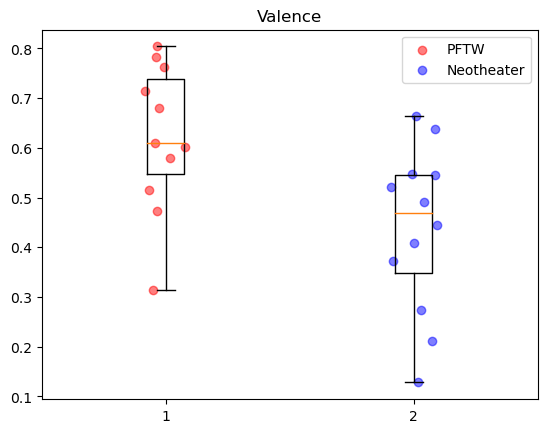

In [42]:
PFTW_valence = af[af['album'] == 'PFTW']['valence']
Neo_valence = af[af['album'] == 'Neotheater']['valence']
PFTW_xs = [1]*len(PFTW_valence)
Neo_xs = [2]*len(Neo_valence)
PFTW_x_jitter = np.random.uniform(-0.10, .10, len(PFTW_xs))
Neo_x_jitter = np.random.uniform(-0.10, .10, len(Neo_xs))

fig4, ax4 = plt.subplots()
ax4.boxplot(PFTW_valence, positions = [1])
ax4.boxplot(Neo_valence, positions = [2])
ax4.scatter(PFTW_xs + PFTW_x_jitter, PFTW_valence, alpha = .5, color = 'red', label = 'PFTW')
ax4.scatter(Neo_xs + Neo_x_jitter, Neo_valence, alpha = .5, color= 'blue', label = 'Neotheater')
ax4.set_title('Valence')
ax4.legend()


plt.show()

As you can see once again, the PFTW album has a higher median of higher-valence songs than the Neotheater album does. In fact, the upper quartile for Neotheater about lines up with the lower quartile of PFTW.

### Statistical Testing ###
Lastly, while using the t-test function, we can evaluate the statistical differences between the two albums, with the same features used in the box plot.

In [43]:
result1 = stats.ttest_ind(PFTW_valence, Neo_valence)

In [44]:
result1.statistic

2.7928336226995722

In [45]:
round(result1.pvalue, 5)

0.0109

Based on the t-test value and the p-value results of the valence, the two albums have a significant difference in valence. Both albums have a distinct valence difference, which is shown by how the p-value is below .05, and the t-test value is far from the middle of a t-distribution.

### Conclusion ###
In conclusion, it seems like with the audio features I picked, being valence and energy, they did not really help prove why I would like both of those albums. Maybe there was a better feature I could've looked at to better decipher the songs, instead of looking at a positive-negative scale. Maybe if there was a more rhythmic-based feature, there could've been more of a correlation, because I usually go for songs that have unique rhythms. But, it was still interesting to see how those two albums compare, and that it doesn't matter to me if they have a variation of high and low valence and energy.